In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 3)

In [2]:
df = pd.read_csv("../../data/kh_Np_timing.csv")

df["time_per_cell"] = (df.N * df.N * df.f_count) / df.time

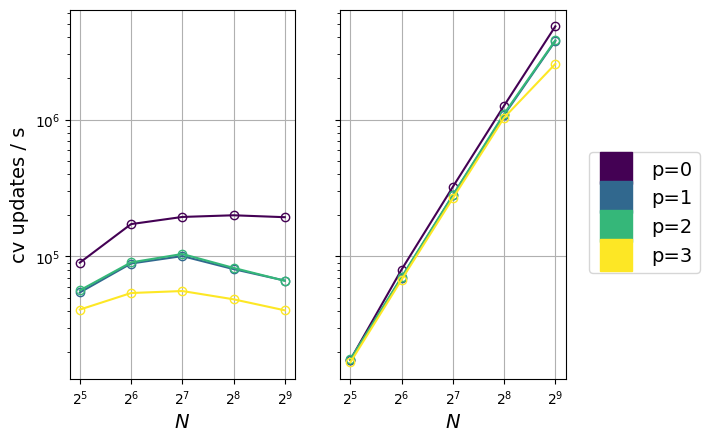

In [11]:
fontsize = 14

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

for cupy, df_cupy in df.groupby("cupy"):
    for p, df_p in df_cupy.groupby("p"):
        ax[{True: 1, False: 0}[cupy]].plot(
            df_p.N,
            df_p.time_per_cell,
            color=color_p(p),
            label=f"{p=}",
            marker="o",
            mfc="none",
        )

ax[0].set_xscale("log", base=2)
ax[0].set_yscale("log")
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel(r"$N$", fontsize=fontsize)
ax[1].set_xlabel(r"$N$", fontsize=fontsize)
ax[0].set_ylabel("cv updates / s", fontsize=fontsize)

leg = ax[1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [0, 1, 2, 3]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig("../../data/kh_Np_timing.png", dpi=300, bbox_inches="tight")